# Lab 12 - Unsupervised learning
- **Author:** Qutub Khan Vajihi
- **Date:** 4/21/2021
- **Course:** INFO 251: Applied machine learning

### Topics:
1. K-Means clustering
2. Dimensionality reduction: PCA

### References: 
* [In Depth: k-Means Clustering - Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
* [Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

## Part 1: k-Means clustering

Two assumptions of the k-means mode
- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers. 

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython
import numpy as np

300 data points with 2 features


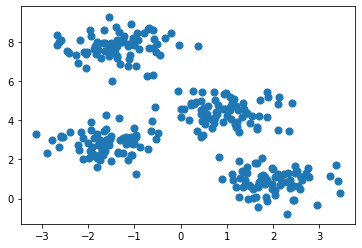

In [114]:
# Generate isotropic Gaussian blobs for clustering.
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, n_features=2, centers=4, 
                       cluster_std=0.60, random_state=0) #you can change the no. of centers if you'd like to

plt.scatter(X[:, 0], X[:, 1], s=50)
print('{} data points with {} features'.format(X.shape[0],X.shape[1]))

In [115]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(kmeans.inertia_) #Intertia is the sum of squared distances of samples to their cloeest cluster center.

212.00599621083478


In [116]:
kmeans.labels_ , y_kmeans #both methods show you the label of each input 

(array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
        3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
        2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
        1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
        1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
        2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
        2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
        0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
        0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
        2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
        1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
        0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
        1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
        1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 

In [117]:
# view the cluster_centers_
kmeans.cluster_centers_

array([[ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906]])

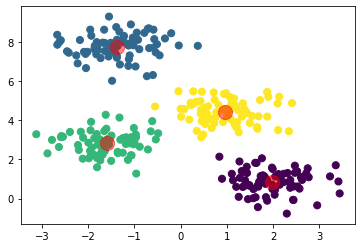

In [118]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

Let's repeat that with different clusters now :-

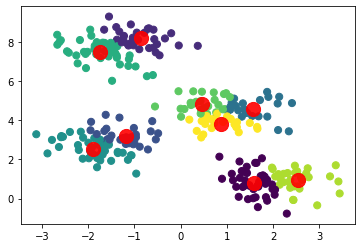

In [119]:
n = 9
kmeans = KMeans(n_clusters=n)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9);

## Elbow Method

* How can we avoid overfitting? Use the elbow method! 
* Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost.

In [120]:
n_clusters = np.arange(1, 40)
sse = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


Text(0, 0.5, 'SSE')

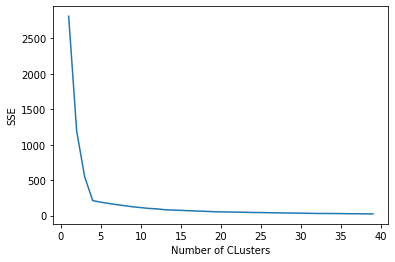

In [121]:
plt.plot(n_clusters, sse)
plt.xlabel('Number of CLusters')
plt.ylabel('SSE')

## Part 2: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has returned! :)

In [122]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import scipy as sp

In [123]:
bdata = load_boston()
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target

Lets run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first few principal components of the data. 

In [124]:
from sklearn.model_selection import train_test_split
v = bdata.feature_names[:]
X_train, X_test, y_train, y_test = train_test_split(boston[v], boston['MEDV'], test_size=0.3, random_state=4973)
print("Initial dimension of data is {}".format(X_train.shape[1]))

Initial dimension of data is 13


In [125]:
from sklearn import decomposition
from sklearn import preprocessing

X_train = X_train[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_test = X_test[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]


pca = decomposition.PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)

print("The amount of variance explained by the projected data is {}".format(np.sum(pca.explained_variance_)))
print("The percentage of variance explained by the projected data is {}%".format(np.sum(pca.explained_variance_ratio_)*100))
print("Dimension of original data {}".format(X_train.shape))
print("Dimension of projected data reprentation {}".format(X_train_pca.shape))


The amount of variance explained by the projected data is 38532.80853666364
The percentage of variance explained by the projected data is 99.71494655688538%
Dimension of original data (354, 10)
Dimension of projected data reprentation (354, 3)


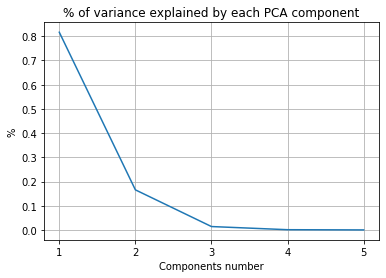

In [126]:
comp_n = 5
pca = PCA(n_components = comp_n)
pca.fit(X_train)
vari = pca.explained_variance_ratio_
    
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(range(1, comp_n+1), vari)

plt.xlabel('Components number')
plt.ylabel('%')
plt.title('% of variance explained by each PCA component')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xticks(range(1, 6), [str(x) for x in range(1, 6)])
plt.grid()

To demonstrate the power of PCA, let's add some very arbitrary features to our dataset and blow up the feature space!

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



v = bdata.feature_names[:]
X_train, X_test, y_train, y_test = train_test_split(boston[v], boston['MEDV'], test_size=0.3, random_state=4973)
print("Initial dimension of data is {}".format(X_train.shape[1]))


X_train = X_train[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X_test = X_test[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]



poly = PolynomialFeatures(4)
X_train = poly.fit_transform(X_train)
print("After adding poly features, dimension of data is {}".format(X_train.shape[1]))

Initial dimension of data is 13
After adding poly features, dimension of data is 1001


The amount of variance explained by the projected data is 9.766958282970596e+21
The percentage of variance explained by the projected data is 99.74699500108198%
Dimension of original data (354, 1001)
Dimension of projected data reprentation (354, 3)


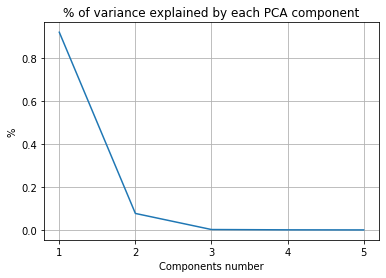

In [128]:
pca = decomposition.PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)

print("The amount of variance explained by the projected data is {}".format(np.sum(pca.explained_variance_)))
print("The percentage of variance explained by the projected data is {}%".format(np.sum(pca.explained_variance_ratio_)*100))
print("Dimension of original data {}".format(X_train.shape))
print("Dimension of projected data reprentation {}".format(X_train_pca.shape))


comp_n = 5
pca = PCA(n_components = comp_n)
pca.fit(X_train)
vari = pca.explained_variance_ratio_
    
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(range(1, comp_n+1), vari)

plt.xlabel('Components number')
plt.ylabel('%')
plt.title('% of variance explained by each PCA component')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xticks(range(1, 6), [str(x) for x in range(1, 6)])
plt.grid()

### Digits Recognition

In [129]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Let's look at some of digits :-

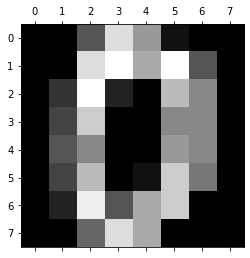

0


In [130]:
plt.matshow(digits.images[0]) 
plt.show() 
print(digits.target[0])

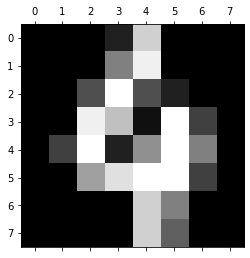

4


In [131]:
plt.matshow(digits.images[100]) 
plt.show() 
print(digits.target[100])

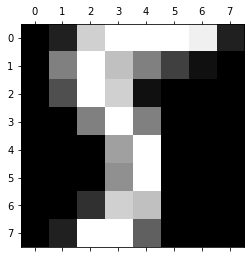

5


In [132]:
plt.matshow(digits.images[781]) 
plt.show() 
print(digits.target[781])

In [133]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


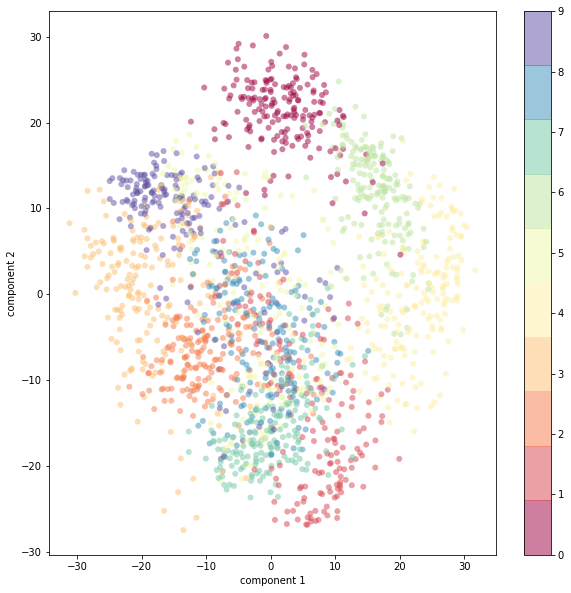

In [134]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()